In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of emails sent to the participants per version
n_A = 10000
n_B = 10000
#We pretend that 10,000 people received Version A, and another 10,000 people received Version B.

# True click-through rates
ctr_A = 0.10  # Version A leads to 10% clicks (i.e., 1 in 10 people clicked)
ctr_B = 0.12  # Version B leads to 12% clicks (slightly better)

# Simulate clicks (1 = clicked, 0 = not clicked)
#We use np.random.binomial to simulate yes/no outcomes based on the given CTR.
clicks_A = np.random.binomial(1, ctr_A, n_A)
clicks_B = np.random.binomial(1, ctr_B, n_B)

# Create DataFrame
ab_test_df = pd.DataFrame({
    "group": ["A"] * n_A + ["B"] * n_B,
    "clicked": np.concatenate([clicks_A, clicks_B])
})

ab_test_df.head()

,group,clicked
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


Is the 2% increase in clicks for Version B actually significant, or just due to random chance?

## Statistical Test (Z-Test)

Null Hypothesis (H₀): There is no difference between version A and B (CTR_A = CTR_B).

Alternative Hypothesis (H₁): There is a difference (CTR_B > CTR_A).

Need to calculate: the difference in proportions, the z-score and the p-value

In [4]:
from statsmodels.stats.proportion import proportions_ztest

# Clicks from each group
clicks = [sum(clicks_B), sum(clicks_A)]

# Total users in each group
nobs = [len(clicks_B), len(clicks_A)]

# Run the z-test for proportions
stat, pval = proportions_ztest(count=clicks, nobs=nobs, alternative='larger')

print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Z-statistic: 6.4957
P-value: 0.0000


We have a very high Z score, 6.4957, meaning the difference between the two proportions is statistically significant.
And p-value is way below the significance level.
Thus, we reject the null hypothesis. Hence, there is a significant evidence suggesting the click-through rate of version B is higher than version A. 
As per the business implication, version B needs to be deployed since it is performing better in terms of user engagement.

C:\Users\Shreha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


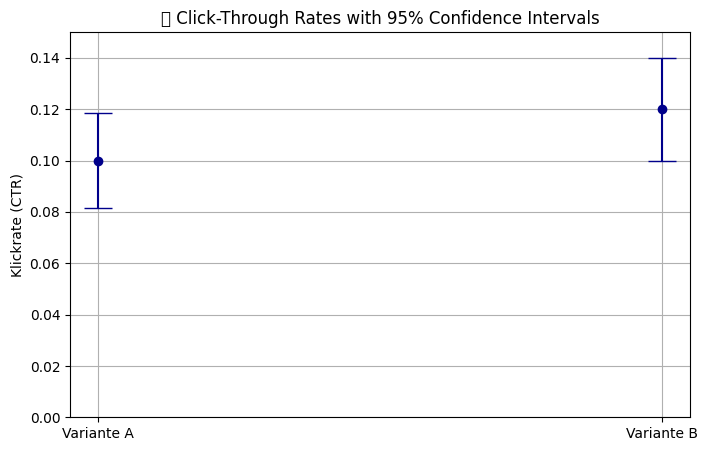

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample sizes and clicks
n_A, clicks_A = 1000, 100
n_B, clicks_B = 1000, 120

# Proportions
p_A = clicks_A / n_A
p_B = clicks_B / n_B

# Standard error for proportion
se_A = np.sqrt(p_A * (1 - p_A) / n_A)
se_B = np.sqrt(p_B * (1 - p_B) / n_B)

# 95% confidence intervals
ci_A = (p_A - 1.96 * se_A, p_A + 1.96 * se_A)
ci_B = (p_B - 1.96 * se_B, p_B + 1.96 * se_B)

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(["Variante A", "Variante B"], [p_A, p_B],
             yerr=[1.96*se_A, 1.96*se_B], fmt='o', capsize=10, color="darkblue")

plt.title("📊 Click-Through Rates with 95% Confidence Intervals")
plt.ylabel("Klickrate (CTR)")
plt.ylim(0, 0.15)
plt.grid(True)
plt.show()